# Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget



filename = "../data/550_sensor_data.csv"  # CHANGE THIS

collumn_names = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']
df = pd.read_csv(filename, header=2, names=collumn_names)

# Calculate the acceleration magnitude using the formula sqrt(ax^2 + ay^2 + az^2)
# and add it as a new column called 'accel_magnitude'.
df['accel_magnitude'] = np.sqrt(df['ax']**2 + df['ay']**2 + df['az']**2)
print(f"Successfully loaded '{filename}'.")
print(f"Found {len(df)} rows and {df.shape[1]} columns of data.")

titles = [
    "Accel X (g)", "Accel Y (g)", "Accel Z (g)",
    "Gyro X (°/s)", "Gyro Y (°/s)", "Gyro Z (°/s)"
]

# o -1 TIRA O OFFSET DA GRAVIDADE JÁ !!!!
df['accel_magnitude'] = np.sqrt(df['ax']**2 + df['ay']**2 + df['az']**2) - 1


FileNotFoundError: [Errno 2] No such file or directory: '../data/output.txt'

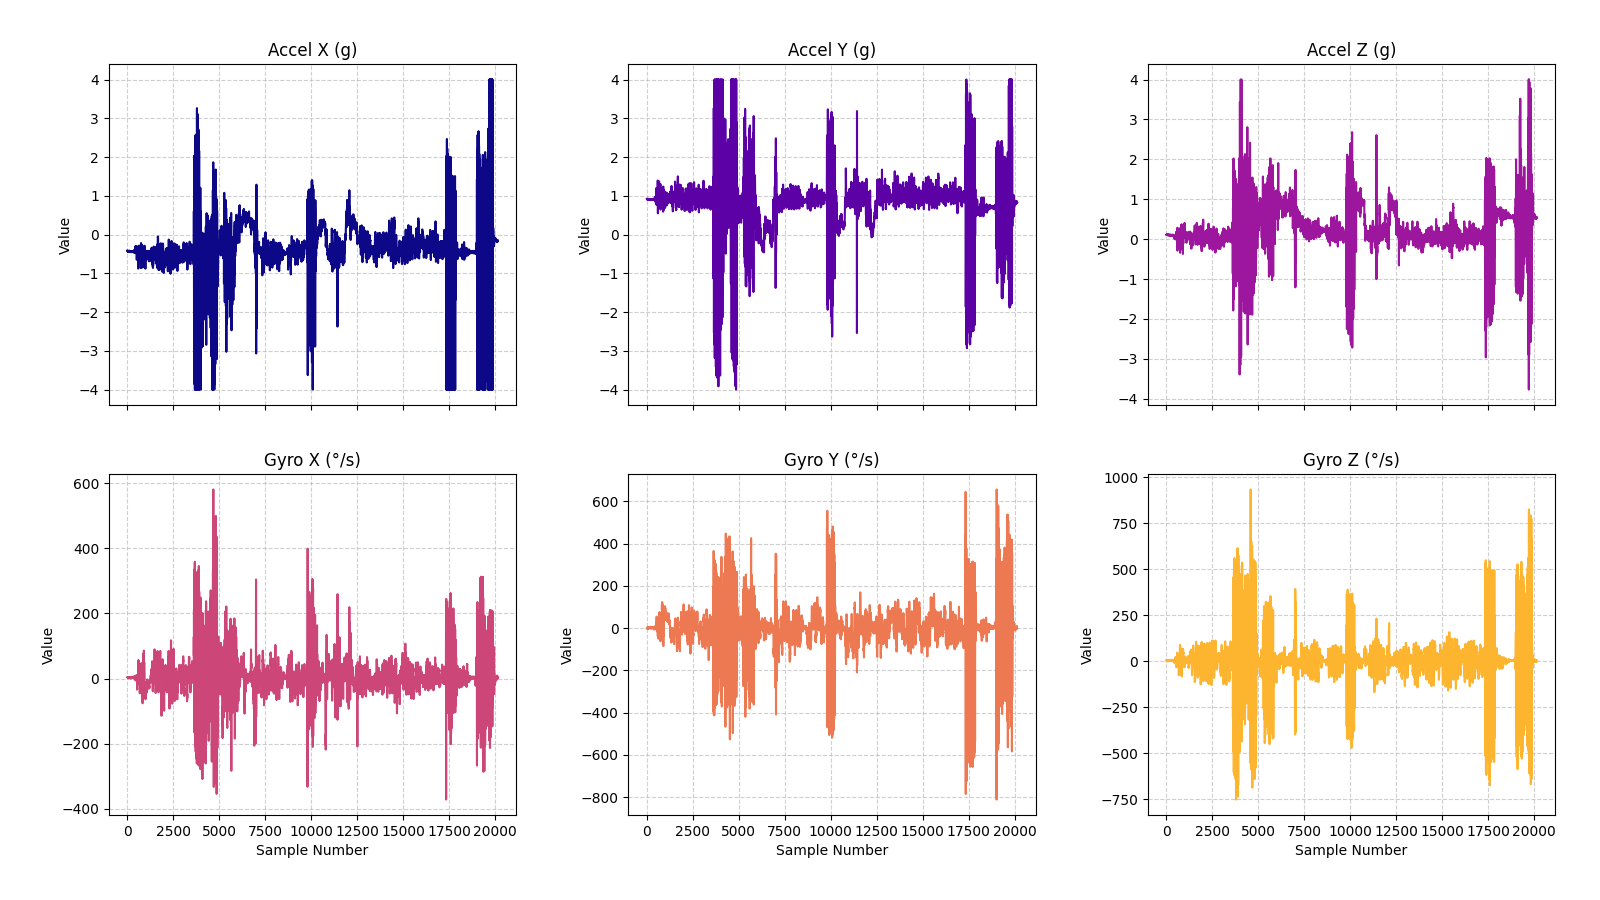

In [5]:
# Create a figure and a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 9), sharex=True)

# Flatten the 2x3 `axes` array into a 1D array to easily loop through it
axes = axes.flatten()

# --- Loop through each of the 6 columns and plot it ---
for i in range(6):
    ax = axes[i]            # Get the current subplot axis
    column_data = df[collumn_names[i]]     # Get the data for the i-th column

    # Plot the data on the current axis
    ax.plot(column_data, label=titles[i], color=plt.cm.plasma(i/6))

    # Set the title and labels for the subplot
    ax.set_title(titles[i], fontsize=12)
    ax.set_ylabel("Value")

    # Add a grid for better readability
    ax.grid(True, linestyle='--', alpha=0.6)

# Set the x-axis label only for the bottom plots
for i in range(3, 6):
    axes[i].set_xlabel("Sample Number")

# Adjust the layout to prevent titles and labels from overlapping
fig.tight_layout(pad=3.0)
# --- Show the plot window ---
plt.show()

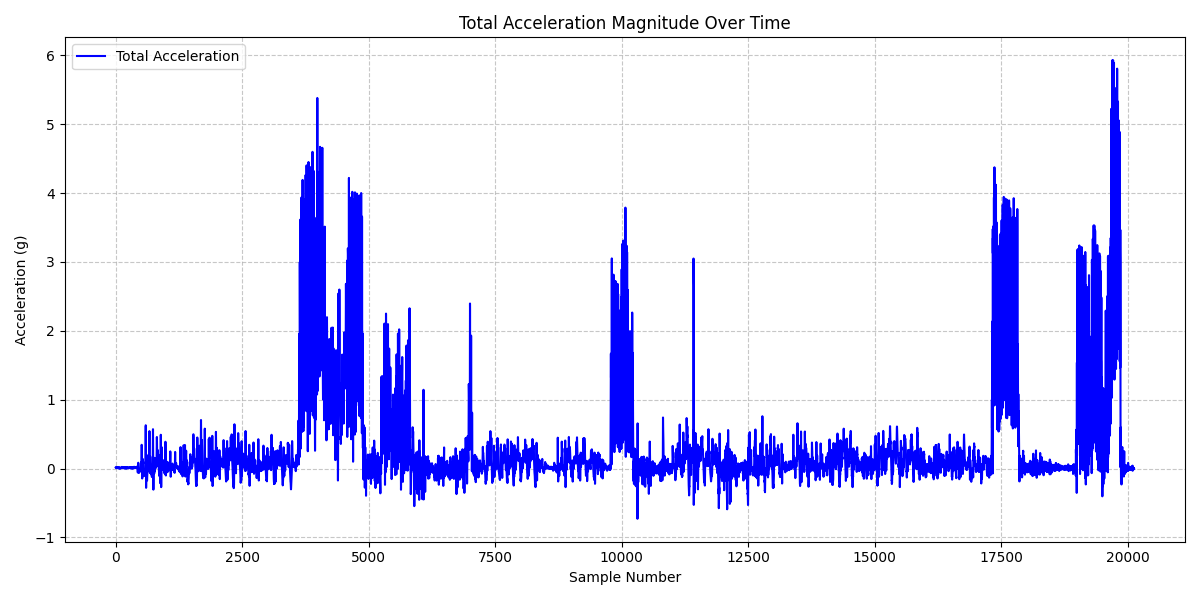

In [6]:
plt.figure(figsize=(12, 6))

# Plot the 'accel_magnitude' column
plt.plot(df['accel_magnitude'], label='Total Acceleration', color='blue')

# Add titles and labels for clarity
plt.title('Total Acceleration Magnitude Over Time')
plt.xlabel('Sample Number')
plt.ylabel('Acceleration (g)')

# Add a grid for easier analysis
plt.grid(True, linestyle='--', alpha=0.7)

# Add a legend to identify the plot line
plt.legend()

# Ensure the plot layout is clean
plt.tight_layout()

# Show the plot
plt.show()

# Filtering

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def exponential_moving_average(signal, alpha):
    """Calculates the Exponential Moving Average of a signal."""
    filtered_signal = [signal[0]]
    for i in range(1, len(signal)):
        new_filtered_value = (alpha * signal[i]) + ((1 - alpha) * filtered_signal[-1])
        filtered_signal.append(new_filtered_value)
    return filtered_signal

# --- Apply the custom filters ---
# Apply Exponential Moving Average with a smoothing factor of 0.1
# A smaller alpha means more smoothing.
alpha = 0.03
df['ax_lp'] = exponential_moving_average(df['ax'] , alpha=alpha)
df['ay_lp'] = exponential_moving_average(df['ay'] , alpha=alpha)
df['az_lp'] = exponential_moving_average(df['az'] , alpha=alpha)

df['accel_magnitude_lp'] = np.sqrt(df['ax_lp']**2 + df['ay_lp']**2 + df['az_lp']**2) - 1



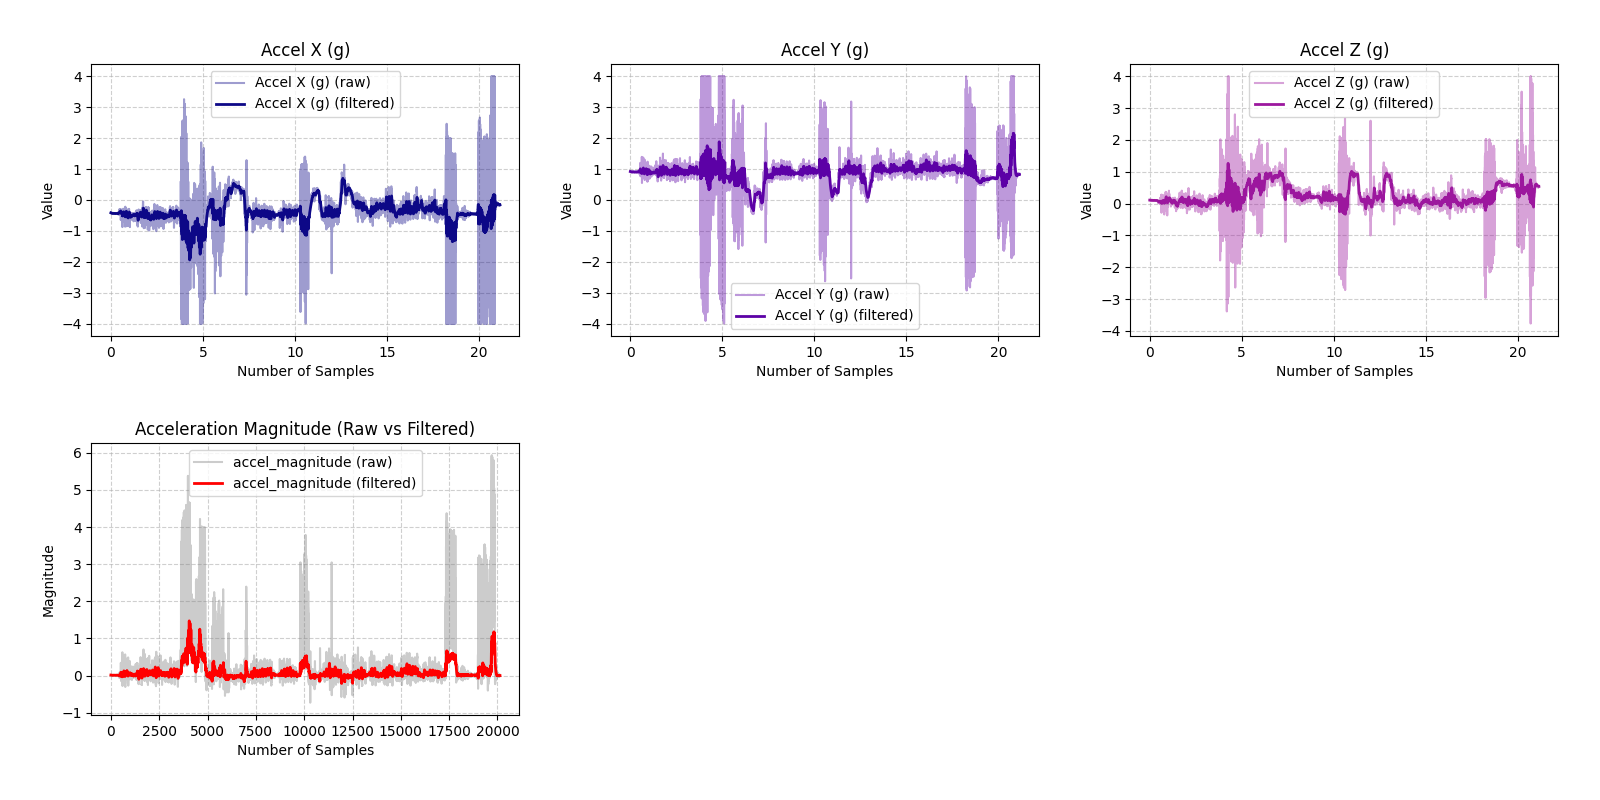

In [8]:
import matplotlib.pyplot as plt

# Create a 2x3 grid of subplots (extra row for the magnitude plot)
fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False)

# Flatten axes array
axes = axes.flatten()

# --- Top row: your 3 filtered plots ---
for i in range(3):
    ax = axes[i]  # current subplot axis

    # Get data for this subplot
    col = collumn_names[i]  # make sure variable name is correct (not 'collumn_names')
    raw = df[col]
    filtered = df[col + "_lp"]


    # Plot original and filtered signals
    ax.plot(np.arange(len(df)) / 952, raw, label=f"{titles[i]} (raw)", color=plt.cm.plasma(i / 6), alpha=0.4)
    ax.plot(np.arange(len(df)) / 952, filtered, label=f"{titles[i]} (filtered)", color=plt.cm.plasma(i / 6), linewidth=2)

    # Titles, labels, and grid
    ax.set_title(titles[i], fontsize=12)
    ax.set_ylabel("Value")
    ax.set_xlabel("Number of Samples")
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.legend()

# --- Bottom plot: accel_magnitude vs accel_magnitude_lp ---
ax_mag = axes[3]  # use the next available subplot (bottom-left position)

ax_mag.plot(df['accel_magnitude'], label='accel_magnitude (raw)', color='gray', alpha=0.4)
ax_mag.plot(df['accel_magnitude_lp'], label='accel_magnitude (filtered)', color='red', linewidth=2)

ax_mag.set_title("Acceleration Magnitude (Raw vs Filtered)", fontsize=12)
ax_mag.set_ylabel("Magnitude")
ax_mag.set_xlabel("Number of Samples")
ax_mag.grid(True, linestyle="--", alpha=0.6)
ax_mag.legend()

# Hide any unused subplots (since we have 4 used out of 6)
for j in range(4, 6):
    fig.delaxes(axes[j])

# Adjust layout
fig.tight_layout(pad=3.0)

# Show figure
plt.show()


### aplicar agora um filtro de media para reduzir mais e termos apenas picos UP-DOWN e nao coisas tipo UP-Up(mas menos intenso) e down

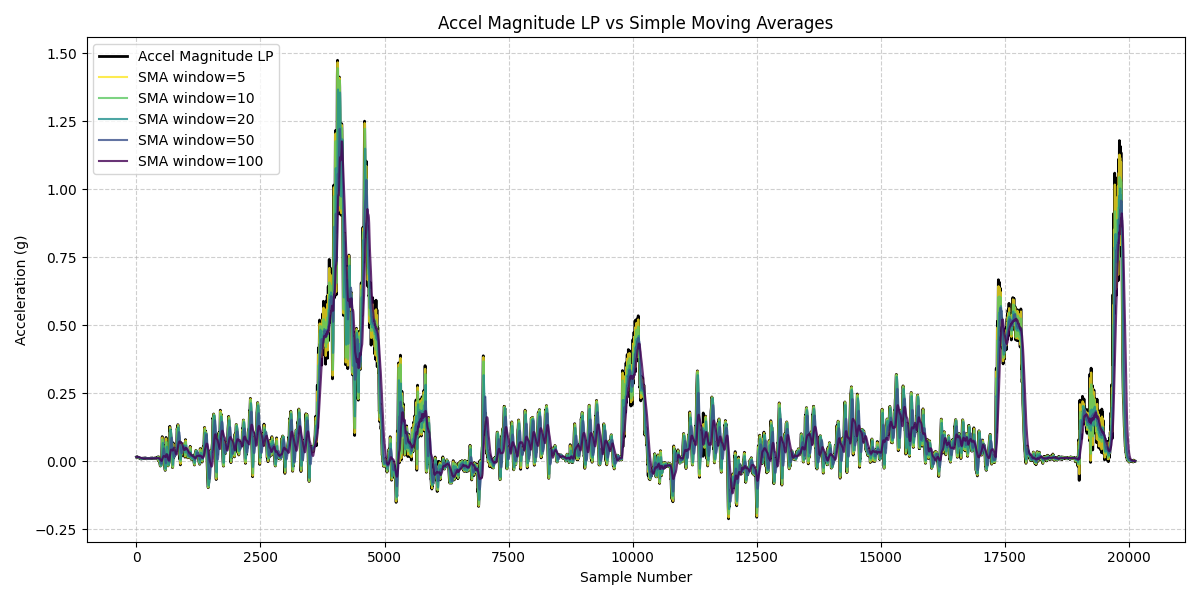

In [9]:
import matplotlib.pyplot as plt


def simple_moving_average(signal, window_size):
    """Calculates the Simple Moving Average of a signal."""
    filtered_signal = []
    for i in range(len(signal)):
        start_index = max(0, i - window_size + 1)
        window = signal[start_index : i + 1]
        window_average = sum(window) / len(window)
        filtered_signal.append(window_average)
    return filtered_signal

# Example window sizes for SMAs
window_sizes = [5, 10, 20, 50, 100]

# Calculate all SMAs of accel_magnitude_lp with different windows
sma_signals = [simple_moving_average(df['accel_magnitude_lp'], w) for w in window_sizes]

plt.figure(figsize=(12, 6))

# Plot the original low-pass filtered accel magnitude
plt.plot(df['accel_magnitude_lp'], label='Accel Magnitude LP', linewidth=2, color='black')

# Plot each SMA with different window sizes
colors = plt.cm.viridis_r(np.linspace(0, 1, len(window_sizes)))
for i, (sma, w) in enumerate(zip(sma_signals, window_sizes)):
    plt.plot(sma, label=f'SMA window={w}', alpha=0.8, color=colors[i])

plt.title('Accel Magnitude LP vs Simple Moving Averages')
plt.xlabel('Sample Number')
plt.ylabel('Acceleration (g)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### o objetivo é tornar o sinal numa sinusoide para identificar o pico alto e baixo do step, assim a funcao é convexa e portanto fica com picos bem definidos

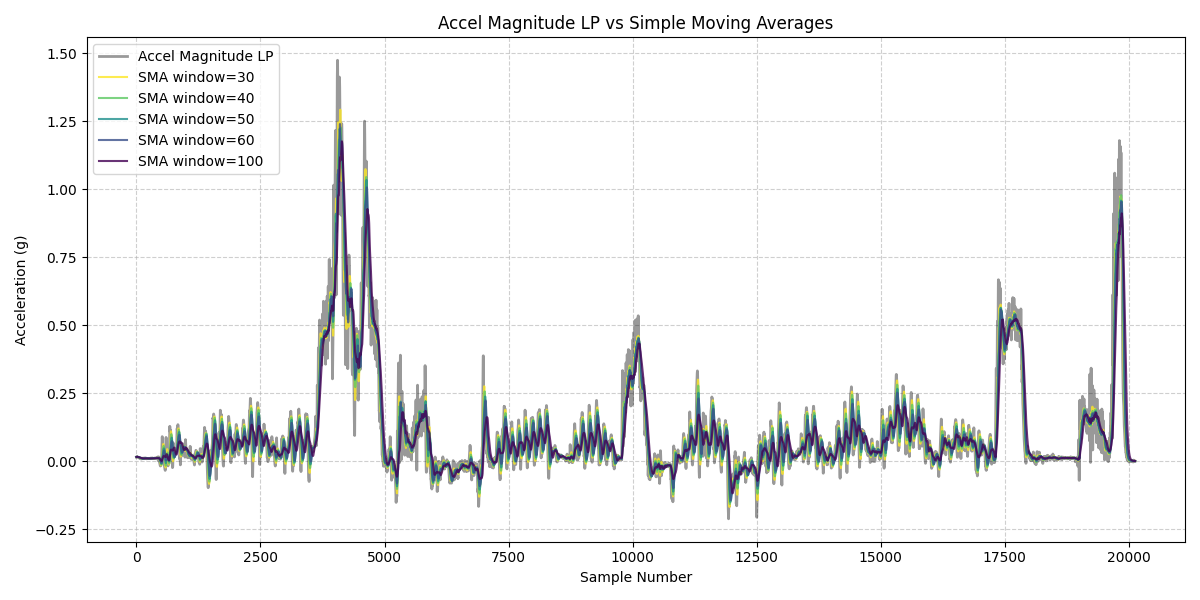

In [10]:
import matplotlib.pyplot as plt


def simple_moving_average(signal, window_size):
    """Calculates the Simple Moving Average of a signal."""
    filtered_signal = []
    for i in range(len(signal)):
        start_index = max(0, i - window_size + 1)
        window = signal[start_index : i + 1]
        window_average = sum(window) / len(window)
        filtered_signal.append(window_average)
    return filtered_signal

# Example window sizes for SMAs
window_sizes = [30, 40, 50, 60, 100]

# Calculate all SMAs of accel_magnitude_lp with different windows
sma_signals = [simple_moving_average(df['accel_magnitude_lp'], w) for w in window_sizes]

plt.figure(figsize=(12, 6))

# Plot the original low-pass filtered accel magnitude
plt.plot(df['accel_magnitude_lp'], label='Accel Magnitude LP', linewidth=2, color='black', alpha=0.4)

# Plot each SMA with different window sizes
colors = plt.cm.viridis_r(np.linspace(0, 1, len(window_sizes)))
for i, (sma, w) in enumerate(zip(sma_signals, window_sizes)):
    plt.plot(sma, label=f'SMA window={w}', alpha=0.8, color=colors[i])

plt.title('Accel Magnitude LP vs Simple Moving Averages')
plt.xlabel('Sample Number')
plt.ylabel('Acceleration (g)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


#### 30 parece ser a media de samples ideal

## peak detection

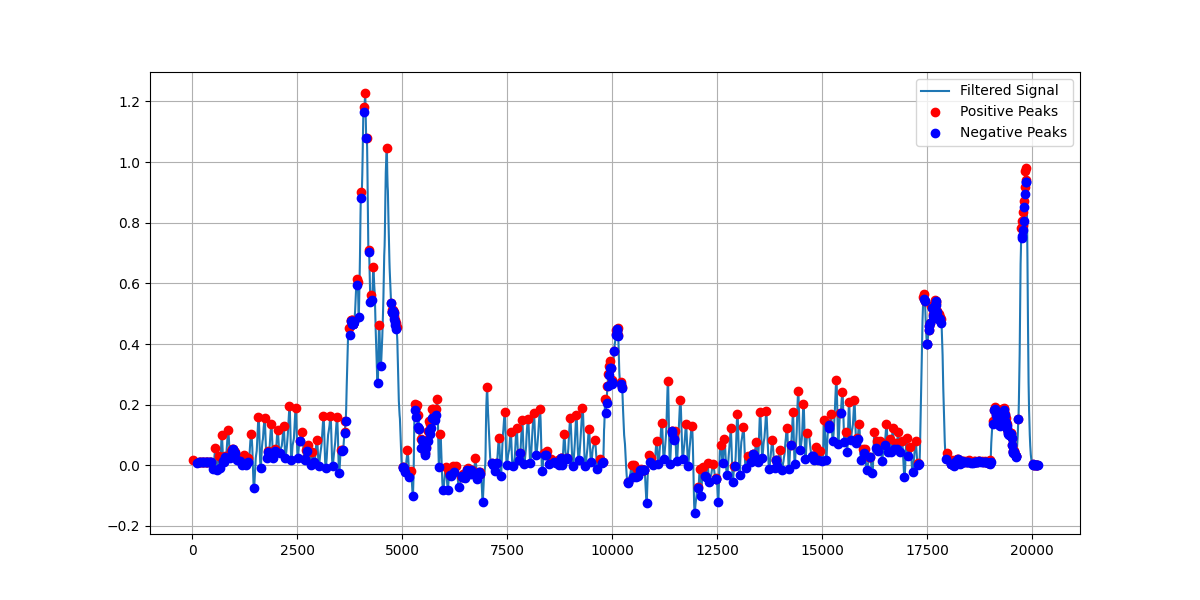

In [11]:
import numpy as np
import matplotlib.pyplot as plt

optimal_w = 40
signal = np.array(simple_moving_average(df['accel_magnitude_lp'], optimal_w))

peaks_pos = []
peaks_neg = []

# We'll keep track of the previous two points to check if the middle one is a peak
# Start iterating from index 2, so we have i-2, i-1, i points for checking peaks
for i in range(2, len(signal)):
    prev2 = signal[i-2]
    prev1 = signal[i-1]
    curr = signal[i]

    # Check if prev1 is a positive peak: goes up then down
    if prev1 > prev2 and prev1 > curr:
        peaks_pos.append(i-1)

    # Check if prev1 is a negative peak: goes down then up
    if prev1 < prev2 and prev1 < curr:
        peaks_neg.append(i-1)

plt.figure(figsize=(12, 6))
plt.plot(signal, label='Filtered Signal')
plt.plot(peaks_pos, signal[peaks_pos], 'ro', label='Positive Peaks')
plt.plot(peaks_neg, signal[peaks_neg], 'bo', label='Negative Peaks')
plt.legend()
plt.grid(True)
plt.show()


# step count algorithm

### abordagem Max->min com tresholds

Step count: 11


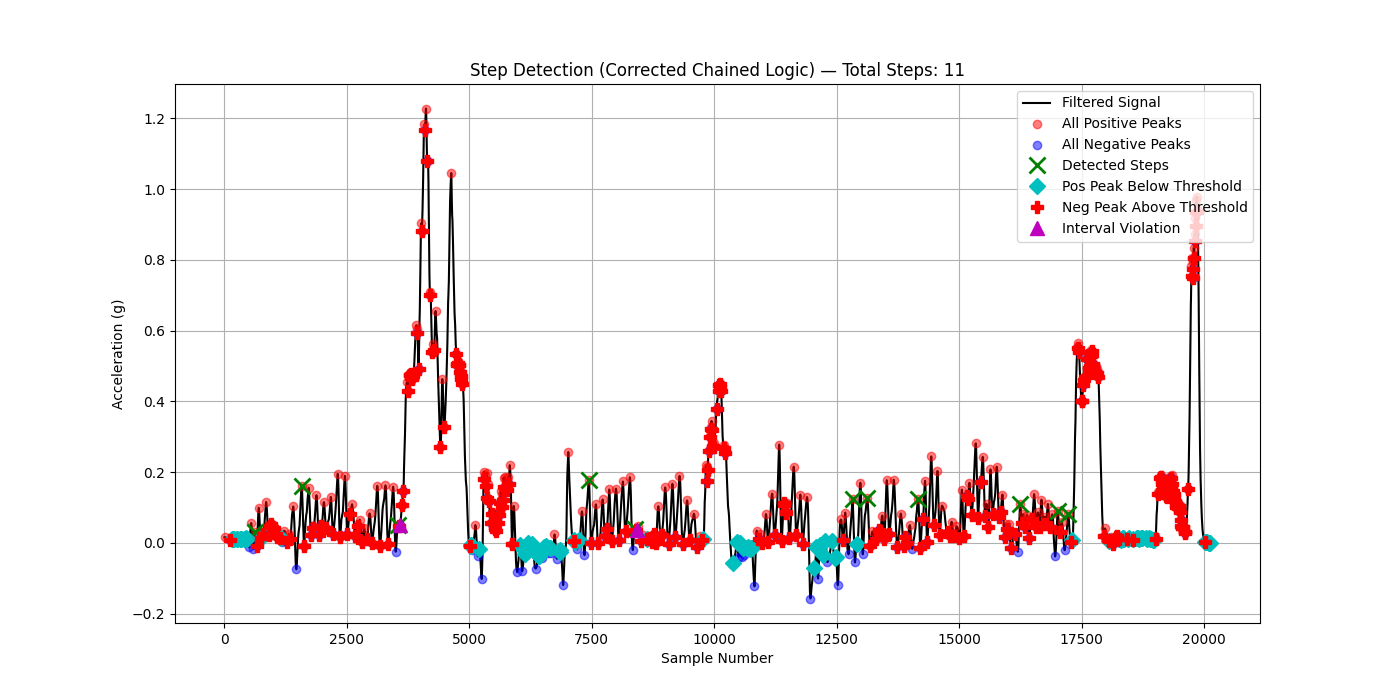

In [12]:
import numpy as np
import matplotlib.pyplot as plt


# --- Algorithm Parameters ---
pos_peak_thresh = 0.015
neg_peak_thresh = -0.015
min_peak_interval = 30

# --- Initialization ---
step_count = 0
steps_indices = []
state = "LOOKING_FOR_FIRST_MAX" 
last_step_completion_index = -min_peak_interval 
candidate_first_max_index = -1
all_pos_peaks = []
all_neg_peaks = []
violations = {
    "pos_peak_below_thresh": [],
    "neg_peak_above_thresh": [],
    "interval_violation": [],
}

# --- Iterative Peak Detection Loop ---
i = 1
while i < len(signal) - 1:
    # --- Check for local maximum (positive peak) ---
    if signal[i] > signal[i - 1] and signal[i] > signal[i + 1]:
        all_pos_peaks.append(i)
        
        if state == "LOOKING_FOR_FIRST_MAX":
            if signal[i] < pos_peak_thresh:
                violations["pos_peak_below_thresh"].append(i)
            elif (i - last_step_completion_index) <= min_peak_interval:
                violations["interval_violation"].append(i)
            else:
                state = "LOOKING_FOR_MIN"
                candidate_first_max_index = i

        elif state == "LOOKING_FOR_MIN":
            # Found another positive peak before a negative one.
            # Assume this new peak is a better starting point.
            if signal[i] >= pos_peak_thresh:
                 candidate_first_max_index = i
            else:
                 # This second peak was invalid, so reset.
                 state = "LOOKING_FOR_FIRST_MAX"

        elif state == "LOOKING_FOR_SECOND_MAX":
            if signal[i] >= pos_peak_thresh:
                # SUCCESS: This is the final peak completing the step.
                step_count += 1
                steps_indices.append(i)
                last_step_completion_index = i
                
                # =======================================================
                # --- THIS IS THE KEY LOGIC CHANGE ---
                # Instead of resetting, use this peak as the start of the next step.
                state = "LOOKING_FOR_MIN" 
                candidate_first_max_index = i
                # =======================================================
            else:
                violations["pos_peak_below_thresh"].append(i)
                state = "LOOKING_FOR_FIRST_MAX"

    # --- Check for local minimum (negative peak) ---
    if signal[i] < signal[i - 1] and signal[i] < signal[i + 1]:
        all_neg_peaks.append(i)

        if state == "LOOKING_FOR_MIN":
            if signal[i] <= neg_peak_thresh:
                state = "LOOKING_FOR_SECOND_MAX"
            else:
                violations["neg_peak_above_thresh"].append(i)
                state = "LOOKING_FOR_FIRST_MAX"
    
    i += 1 # Don't forget to increment the counter!

print(f"Step count: {step_count}")

# --- Plotting ---
plt.figure(figsize=(14, 7))
plt.plot(signal, label='Filtered Signal', linewidth=1.5, color='black')
plt.plot(all_pos_peaks, signal[all_pos_peaks], 'ro', markersize=6, alpha=0.5, label='All Positive Peaks')
plt.plot(all_neg_peaks, signal[all_neg_peaks], 'bo', markersize=6, alpha=0.5, label='All Negative Peaks')
plt.plot(steps_indices, signal[steps_indices], 'gx', markersize=12, mew=2, label='Detected Steps')
if violations["pos_peak_below_thresh"]:
    plt.plot(violations["pos_peak_below_thresh"], signal[violations["pos_peak_below_thresh"]], 'cD', markersize=8, label='Pos Peak Below Threshold')
if violations["neg_peak_above_thresh"]:
    plt.plot(violations["neg_peak_above_thresh"], signal[violations["neg_peak_above_thresh"]], 'rP', markersize=8, label='Neg Peak Above Threshold')
if violations["interval_violation"]:
    plt.plot(violations["interval_violation"], signal[violations["interval_violation"]], 'm^', markersize=10, label='Interval Violation')
plt.title(f'Step Detection (Corrected Chained Logic) — Total Steps: {step_count}')
plt.xlabel('Sample Number')
plt.ylabel('Acceleration (g)')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

### conclusao retirada:
esta abordagem é boa no entanto so funciona bem para andar com cadencia constante
uma cadencia alternada em vez de tresholds considerar amplitude de diferenca entre um pico positivo e outro negativo consecutivo, se diferenca for > threshold_amplitude entao step é detetado

hm maybe usar big dataset onde training set sao os dados dos picos:
 diferenca de tempo entre ambos, posicoes relativas, threshold positivo e negativo, diferenca de amplitude entre picos
 fazer bruteforce para ver qual melhor combinacao de valores aceitaveis da mais accuracy OU
 fazer neural networks ou svm idk e ver quais é que tem a melhor performance para ver que valores optar? 

arranjar metodo que permite aquisicao de dados em real time ao mesmo tempo que indicamos quando tamos a fazer um passo.

### abordagem Max->min->Max com amplitudes thresholds

Step count: 112


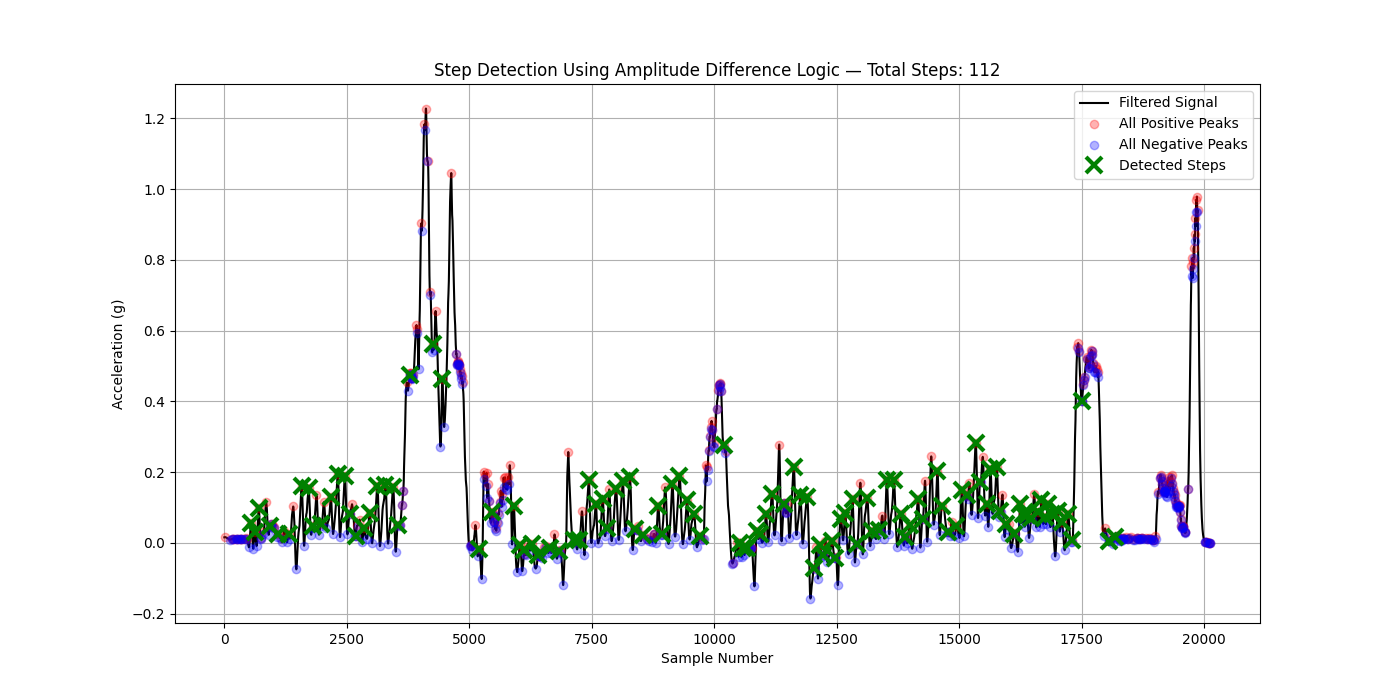

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# --- Algorithm Parameters (Now based on amplitude differences) ---

min_peak_interval = 40
max1_min_diff_bounds = (0.0169, 0.0169 +  0.4281)   # (lower, upper)
max2_min_diff_bounds = (0, 0 + 0.2362)   # (lower, upper)
max1_max2_diff_bounds = (0, 0 + 0.2641) # (lower, upper) - for similarity

# --- Initialization of State Variables ---
step_intervals = []
state = "LOOKING_FOR_FIRST_MAX"
candidate_first_max_index = -1
candidate_min_index = -1

# For plotting purposes
all_pos_peaks = []
all_neg_peaks = []

# 2. ITERATIVE PEAK DETECTION LOOP (Raw Code)
i = 1
while i < len(signal) - 1:
    # --- Check for local maximum (positive peak) ---
    if signal[i] > signal[i - 1] and signal[i] > signal[i + 1]:
        all_pos_peaks.append(i) # Log every positive peak for plotting

        if state == "LOOKING_FOR_FIRST_MAX":
            # Any positive peak can start a sequence
            state = "LOOKING_FOR_MIN"
            candidate_first_max_index = i
        
        elif state == "LOOKING_FOR_MIN":
            # Found another max before a min. Assume this new one is a better start.
            candidate_first_max_index = i

        elif state == "LOOKING_FOR_SECOND_MAX":
            # --- This is where all validation now happens ---
            max1_val = signal[candidate_first_max_index]
            min_val = signal[candidate_min_index]
            max2_val = signal[i]

            # Calculate the differences
            diff_max1_min = max1_val - min_val
            diff_max2_min = max2_val - min_val
            diff_max1_max2 = abs(max1_val - max2_val)
            interval_width = i - candidate_first_max_index

            # --- Check all conditions against their bounds ---
            is_wide_enough = interval_width >= min_peak_interval
            is_max1_min_valid = max1_min_diff_bounds[0] <= diff_max1_min <= max1_min_diff_bounds[1]
            is_max2_min_valid = max2_min_diff_bounds[0] <= diff_max2_min <= max2_min_diff_bounds[1]
            is_max1_max2_valid = max1_max2_diff_bounds[0] <= diff_max1_max2 <= max1_max2_diff_bounds[1]

            if is_wide_enough and is_max1_min_valid and is_max2_min_valid and is_max1_max2_valid:
                # SUCCESS: The step is valid.
                step_intervals.append([candidate_first_max_index, i])
                # Chain the logic: this peak is now the start of the next potential step.
                state = "LOOKING_FOR_MIN" 
                candidate_first_max_index = i
            else:
                # Sequence failed validation. Use this peak as a new potential start.
                state = "LOOKING_FOR_MIN"
                candidate_first_max_index = i

    # --- Check for local minimum (negative peak) ---
    if signal[i] < signal[i - 1] and signal[i] < signal[i + 1]:
        all_neg_peaks.append(i) # Log every negative peak for plotting

        if state == "LOOKING_FOR_MIN":
            # Found the valley, now look for the final peak
            state = "LOOKING_FOR_SECOND_MAX"
            candidate_min_index = i
    
    i += 1


# Extract the final step indices (the second max peak of each interval) for plotting
if step_intervals:
    _, steps_indices = zip(*step_intervals)
    steps_indices = list(steps_indices)
else:
    steps_indices = []
    
step_count = len(steps_indices)
print(f"Step count: {step_count}")

# --- Plotting ---
plt.figure(figsize=(14, 7))
plt.plot(signal, label='Filtered Signal', linewidth=1.5, color='black')

# Plot all peaks that were candidates
plt.plot(all_pos_peaks, signal[all_pos_peaks], 'ro', markersize=6, alpha=0.3, label='All Positive Peaks')
plt.plot(all_neg_peaks, signal[all_neg_peaks], 'bo', markersize=6, alpha=0.3, label='All Negative Peaks')

# Plot the final, validated steps
if steps_indices:
    plt.plot(steps_indices, signal[steps_indices], 'gx', markersize=12, mew=3, label='Detected Steps')

plt.title(f'Step Detection Using Amplitude Difference Logic — Total Steps: {step_count}')
plt.xlabel('Sample Number')
plt.ylabel('Acceleration (g)')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

# Training Dataset

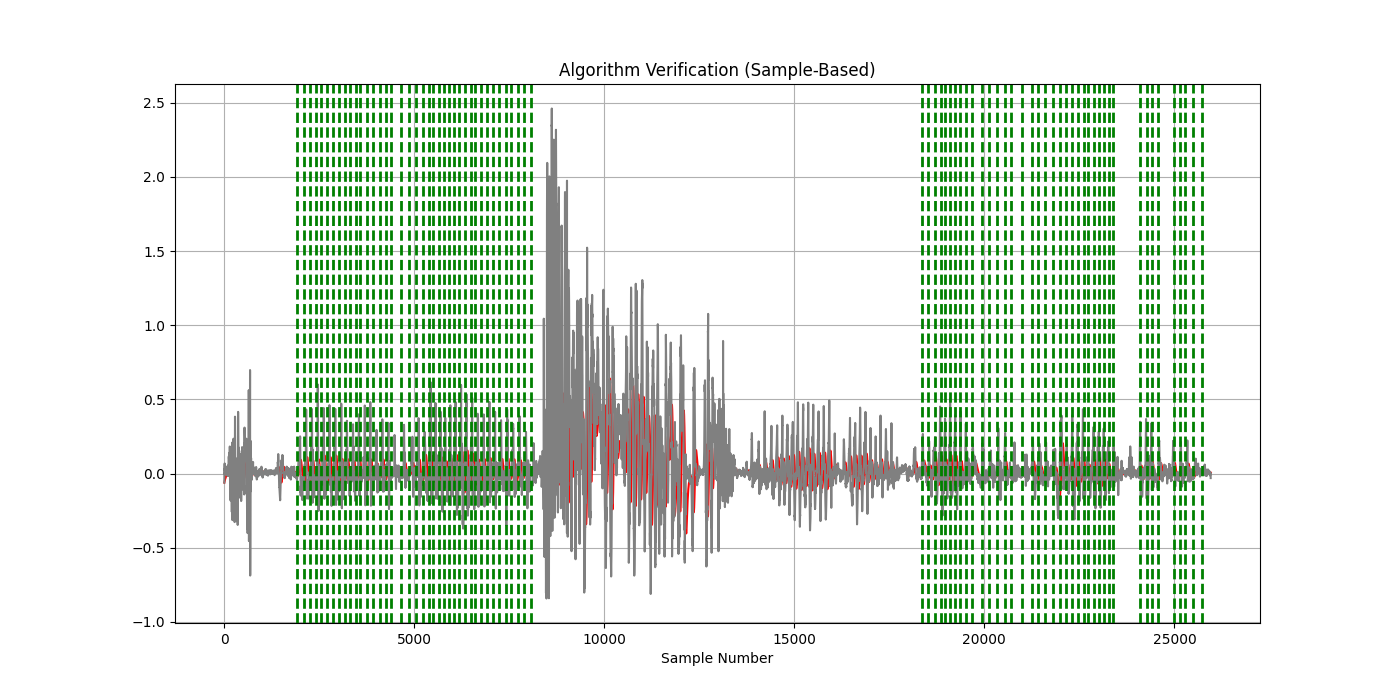

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the recorded data and your manual sample numbers
sensor_data = pd.read_csv("../data/sensor_data.csv")
manual_steps = pd.read_csv("../data/manual_step_samples.csv")

# This will give you a list of detected step *indices*, which is exactly what you need.
# For example:
# detected_step_indices = [150, 220, 285, ...] 

sensor_data['ax_lp'] = exponential_moving_average(sensor_data['ax'] , alpha=alpha)
sensor_data['ay_lp'] = exponential_moving_average(sensor_data['ay'] , alpha=alpha)
sensor_data['az_lp'] = exponential_moving_average(sensor_data['az'] , alpha=alpha)

sensor_data['accel_magnitude_lp'] = np.sqrt(sensor_data['ax_lp']**2 + sensor_data['ay_lp']**2 + sensor_data['az_lp']**2) - 1
sensor_data['accel_magnitude'] = np.sqrt(sensor_data['ax']**2 + sensor_data['ay']**2 + sensor_data['az']**2) - 1

signal = np.array(simple_moving_average(sensor_data['accel_magnitude_lp'], optimal_w))

plt.figure(figsize=(14, 7))
plt.plot(signal, label='Processed Accel Signal',color='red')
plt.plot(sensor_data['accel_magnitude'], label='Raw Accel Signal', color='gray')

# Plot the manual steps as vertical lines at the recorded sample numbers
for sample_num in manual_steps['sample_number']:
    plt.axvline(x=sample_num, color='g', linestyle='--', linewidth=2, label='Manual Step (Ground Truth)')


plt.title("Algorithm Verification (Sample-Based)")
plt.xlabel("Sample Number")
plt.grid(True)
plt.show()

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def find_step_intervals_by_diff(signal, min_peak_interval, 
                                max1_min_diff_bounds, 
                                max2_min_diff_bounds, 
                                max1_max2_diff_bounds):
    """
    Detects steps based on the amplitude differences between peaks in a
    Max -> Min -> Max sequence.

    Args:
        signal (np.array): The input signal data.
        min_peak_interval (int): The minimum number of samples BETWEEN the first
                                 and second positive peaks of a single step.
        max1_min_diff_bounds (tuple): A (lower, upper) bound for the amplitude
                                      difference between Max Peak 1 and the Min Peak.
        max2_min_diff_bounds (tuple): A (lower, upper) bound for the amplitude
                                      difference between Max Peak 2 and the Min Peak.
        max1_max2_diff_bounds (tuple): A (lower, upper) bound for the absolute
                                       amplitude difference between the two Max Peaks.
    Returns:
        list: A list of detected step intervals in the format [sample_max_peak_1, sample_max_peak_2].
    """
    
    step_intervals = []
    state = "LOOKING_FOR_FIRST_MAX"
    candidate_first_max_index = -1
    candidate_min_index = -1

    i = 1
    while i < len(signal) - 1:
        # --- Check for local maximum (positive peak) ---
        if signal[i] > signal[i - 1] and signal[i] > signal[i + 1]:
            if state == "LOOKING_FOR_FIRST_MAX":
                # Any positive peak can start a sequence
                state = "LOOKING_FOR_MIN"
                candidate_first_max_index = i
            
            elif state == "LOOKING_FOR_MIN":
                # Found another max before a min. Assume this new one is a better start.
                candidate_first_max_index = i

            elif state == "LOOKING_FOR_SECOND_MAX":
                # --- This is where all validation now happens ---
                max1_val = signal[candidate_first_max_index]
                min_val = signal[candidate_min_index]
                max2_val = signal[i]

                # Calculate the differences
                diff_max1_min = max1_val - min_val
                diff_max2_min = max2_val - min_val
                diff_max1_max2 = abs(max1_val - max2_val) # Absolute difference is more robust
                interval_width = i - candidate_first_max_index

                # --- Check all conditions against their bounds ---
                is_wide_enough = interval_width >= min_peak_interval
                is_max1_min_valid = max1_min_diff_bounds[0] <= diff_max1_min <= max1_min_diff_bounds[1]
                is_max2_min_valid = max2_min_diff_bounds[0] <= diff_max2_min <= max2_min_diff_bounds[1]
                is_max1_max2_valid = max1_max2_diff_bounds[0] <= diff_max1_max2 <= max1_max2_diff_bounds[1]

                if is_wide_enough and is_max1_min_valid and is_max2_min_valid and is_max1_max2_valid:
                    # SUCCESS: The step is valid.
                    step_intervals.append([candidate_first_max_index, i])
                    # Chain the logic: this peak is now the start of the next potential step.
                    state = "LOOKING_FOR_MIN" 
                    candidate_first_max_index = i
                else:
                    # Sequence failed validation. Use this peak as a new potential start.
                    state = "LOOKING_FOR_MIN"
                    candidate_first_max_index = i

        # --- Check for local minimum (negative peak) ---
        if signal[i] < signal[i - 1] and signal[i] < signal[i + 1]:
            if state == "LOOKING_FOR_MIN":
                # Found the valley, now look for the final peak
                state = "LOOKING_FOR_SECOND_MAX"
                candidate_min_index = i
        
        i += 1
        
    return step_intervals



# 3. Call the new function
detected_intervals = find_step_intervals_by_diff(
    signal=signal,
    min_peak_interval=30,
    max1_min_diff_bounds=(0.0001, 1),
    max2_min_diff_bounds=(0.0001, 1),
    max1_max2_diff_bounds=(0.0001, 1)
)


Detected 202 steps.
Intervals [Max Peak 1, Max Peak 2]:


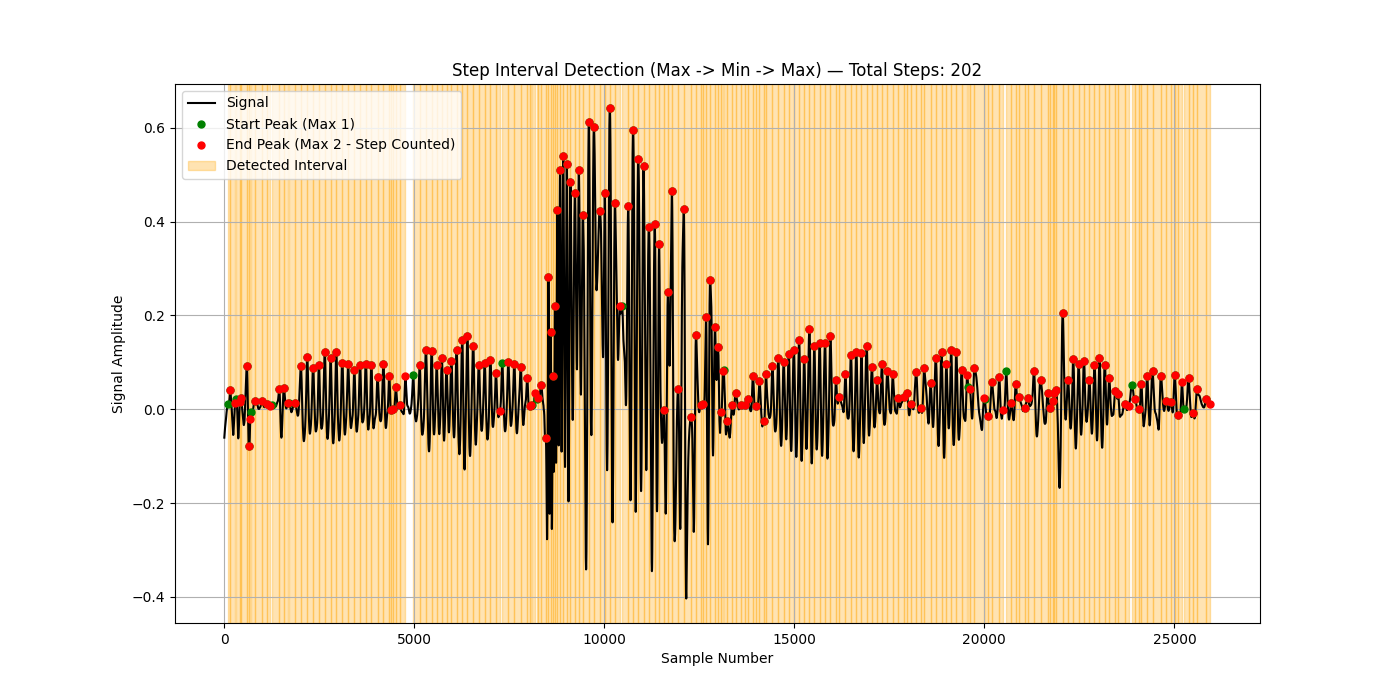

In [16]:
# 4. Print the output
print(f"Detected {len(detected_intervals)} steps.")
print("Intervals [Max Peak 1, Max Peak 2]:")

# 5. (Optional) Plot the results to verify
plt.figure(figsize=(14, 7))
plt.plot(signal, label='Signal', color='black')

# Unzip the intervals and plot the start and end peaks
if detected_intervals:
    max_peaks_1, max_peaks_2 = zip(*detected_intervals)
    plt.plot(max_peaks_1, signal[list(max_peaks_1)], 'go', markersize=5, label='Start Peak (Max 1)')
    plt.plot(max_peaks_2, signal[list(max_peaks_2)], 'ro', markersize=5, label='End Peak (Max 2 - Step Counted)')
    
    # Shade the area for each detected step interval
    for i, interval in enumerate(detected_intervals):
        label = 'Detected Interval' if i == 0 else ""
        plt.axvspan(interval[0], interval[1], color='orange', alpha=0.3, label=label)


plt.title(f'Step Interval Detection (Max -> Min -> Max) — Total Steps: {len(detected_intervals)}')
plt.xlabel('Sample Number')
plt.ylabel('Signal Amplitude')
plt.grid(True)
plt.legend()
plt.show()

## Testando accuracy

--- Algorithm Performance ---
Manual Steps Found (True Positives): 77 / 80
Manual Steps Missed (False Negatives): 3
Extra Detections (False Positives): 128


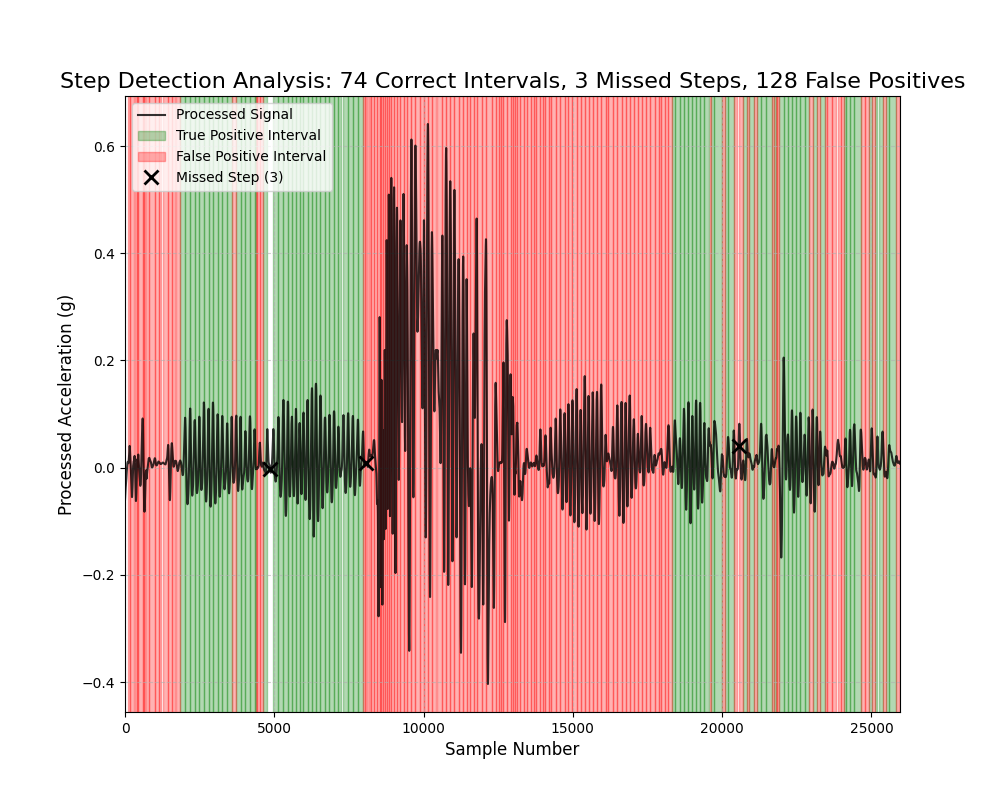

In [17]:
# =================================================================
# 3. COMPARISON LOGIC
# =================================================================
manual_steps_arr = manual_steps['sample_number'].to_numpy()
is_manual_step_detected = np.zeros(len(manual_steps_arr), dtype=bool)
is_interval_a_true_positive = np.zeros(len(detected_intervals), dtype=bool)

for i, manual_sample in enumerate(manual_steps_arr):
    for j, interval in enumerate(detected_intervals):
        start_peak_index, end_peak_index = interval
        if start_peak_index <= manual_sample <= end_peak_index:
            is_manual_step_detected[i] = True
            is_interval_a_true_positive[j] = True
            # We don't break here, allowing one interval to potentially cover two close manual steps

# Categorize everything
missed_steps = manual_steps_arr[~is_manual_step_detected]
true_positive_intervals = [interval for i, interval in enumerate(detected_intervals) if is_interval_a_true_positive[i]]
false_positive_intervals = [interval for i, interval in enumerate(detected_intervals) if not is_interval_a_true_positive[i]]

print("--- Algorithm Performance ---")
print(f"Manual Steps Found (True Positives): {np.sum(is_manual_step_detected)} / {len(manual_steps_arr)}")
print(f"Manual Steps Missed (False Negatives): {len(missed_steps)}")
print(f"Extra Detections (False Positives): {len(false_positive_intervals)}")

# =================================================================
# 4. PLOTTING
# =================================================================
plt.figure(figsize=(10, 8))

# --- Plot the main signal ---
plt.plot(signal, color='black', label='Processed Signal', zorder=2, alpha=0.8)

# --- Plot the results using shaded areas ---
# True Positives (Green shaded areas)
for i, interval in enumerate(true_positive_intervals):
    label = 'True Positive Interval' if i == 0 else ""
    plt.axvspan(interval[0], interval[1], color='green', alpha=0.3, label=label, zorder=1)

# False Positives (Red shaded areas)
for i, interval in enumerate(false_positive_intervals):
    label = 'False Positive Interval' if i == 0 else ""
    plt.axvspan(interval[0], interval[1], color='red', alpha=0.3, label=label, zorder=1)

# Missed Steps (Black 'X' markers)
if len(missed_steps) > 0:
    plt.plot(missed_steps, signal[missed_steps], 'kx', markersize=10, mew=2, label=f'Missed Step ({len(missed_steps)})', zorder=5)

# --- Final Touches ---
title = f"Step Detection Analysis: {len(true_positive_intervals)} Correct Intervals, {len(missed_steps)} Missed Steps, {len(false_positive_intervals)} False Positives"
plt.title(title, fontsize=16)
plt.xlabel("Sample Number", fontsize=12)
plt.ylabel("Processed Acceleration (g)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, len(sensor_data))
plt.show()

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def test_accuracy(detected_intervals, manual_steps_df, verbose=False):
    """
    Calculates and visualizes the performance of a step detection algorithm.

    This function compares the intervals found by an algorithm against a list of
    manually-recorded "ground truth" steps. It calculates performance metrics
    (Precision, Recall, F1-Score) and generates a plot that clearly distinguishes
    between true positives, false positives, and false negatives.

    Args:
        detected_intervals (list): The list of [start, end] intervals returned
                                   by the step detection algorithm.
        manual_steps_df (pd.DataFrame): A DataFrame loaded from your CSV,
                                        containing a 'sample_number' column.
    
    Returns:
        dict: A dictionary containing the calculated performance metrics.
    """
    
    # =================================================================
    # 1. COMPARISON LOGIC
    # =================================================================
    manual_steps_arr = manual_steps_df['sample_number'].to_numpy()
    
    # Boolean flags to track matches
    is_manual_step_detected = np.zeros(len(manual_steps_arr), dtype=bool)
    is_interval_a_true_positive = np.zeros(len(detected_intervals), dtype=bool)

    # Iterate through each manual step to see if it was found
    for i, manual_sample in enumerate(manual_steps_arr):
        for j, interval in enumerate(detected_intervals):
            start_peak_index, end_peak_index = interval
            # Check if the manual step falls within the detected interval
            if start_peak_index <= manual_sample <= end_peak_index:
                is_manual_step_detected[i] = True
                is_interval_a_true_positive[j] = True
                break # A manual step can only be found once

    # --- Calculate performance metrics ---
    true_positives = np.sum(is_manual_step_detected)
    false_negatives = len(manual_steps_arr) - true_positives
    false_positives = len(detected_intervals) - np.sum(is_interval_a_true_positive)
    
    # Precision: Of all the steps we detected, how many were real?
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    # Recall: Of all the real steps that exist, how many did we find?
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    # F1-Score: The harmonic mean of Precision and Recall. A single great score.
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    if verbose:
        print("--- Algorithm Performance Report ---")
        print(f"Manual Steps Found (True Positives):   {true_positives} / {len(manual_steps_arr)}")
        print(f"Manual Steps Missed (False Negatives): {false_negatives}")
        print(f"Extra Detections (False Positives):    {false_positives}")
        print("-" * 36)
        print(f"Precision: {precision:.2%}")
        print(f"Recall:    {recall:.2%}")
        print(f"F1-Score:  {f1_score:.4f}")
        print("-" * 36)
    
    return {
        'true_positives': true_positives,
        'false_negatives': false_negatives,
        'false_positives': false_positives,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score
    }


# 4. Call the new function to get the full performance analysis
performance_metrics = test_accuracy(detected_intervals, manual_steps)
print(performance_metrics)

{'true_positives': np.int64(77), 'false_negatives': np.int64(3), 'false_positives': np.int64(128), 'precision': np.float64(0.375609756097561), 'recall': np.float64(0.9625), 'f1_score': np.float64(0.5403508771929825)}


## Otimizar parametros para melhor f1-score

In [19]:
import pandas as pd
import numpy as np
import time
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args

space  = [
    Integer(10, 200, name='optimal_w'),
    Real(0.01, 0.2, name='alpha'),
    Integer(20, 200, name='min_peak_interval'),
    # Bounds for Max1-Min difference
    Real(0, 0.8, name='max1_min_lower'),
    Real(0, 0.8, name='max1_min_delta'), # USA SE DELTA POI SÉ MAIS FACIL SE DEFINISSE UUM UPPER TINHA Q INICIALIZARA CONSOANTE O LOWER PARA RESPEITAR BOUND
    # Bounds for Max2-Min difference
    Real(0, 0.8, name='max2_min_lower'),
    Real(0, 0.8, name='max2_min_delta'),
    # Bounds for Max1-Max2 difference
    Real(0, 0.8, name='max1_max2_lower'),
    Real(0, 0.8, name='max1_max2_delta'),
]


# --- NEW: Caching dictionary to speed up EMA calculations ---
ema_cache = {}

# --- NEW: Updated Objective Function ---
@use_named_args(space)
def objective(**params):
    """
    NOW, this function recalculates the signal for each run using the
    provided alpha and optimal_w.
    """
    alpha = params['alpha']
    optimal_w = params['optimal_w']

    # --- Caching logic for efficiency ---
    if alpha not in ema_cache:
        # If we haven't seen this alpha before, calculate and store the EMA result
        ax_lp = exponential_moving_average(sensor_data['ax'], alpha)
        ay_lp = exponential_moving_average(sensor_data['ay'], alpha)
        az_lp = exponential_moving_average(sensor_data['az'], alpha)
        accel_mag_lp = np.sqrt(np.square(ax_lp) + np.square(ay_lp) + np.square(az_lp)) - 1.0
        ema_cache[alpha] = accel_mag_lp
    
    # Retrieve the (possibly cached) EMA result
    accel_magnitude_lp = ema_cache[alpha]

    # --- Generate the final signal for this run ---
    signal = simple_moving_average(accel_magnitude_lp, optimal_w)
    
    # --- Reconstruct the bounds for the detection algorithm ---
    max1_min_b = (params['max1_min_lower'], params['max1_min_lower'] + params['max1_min_delta'])
    max2_min_b = (params['max2_min_lower'], params['max2_min_lower'] + params['max2_min_delta'])
    max1_max2_b = (params['max1_max2_lower'], params['max1_max2_lower'] + params['max1_max2_delta'])

    # Run the core algorithm on the newly generated signal
    detected_intervals = find_step_intervals_by_diff(
        signal=signal,
        min_peak_interval=params['min_peak_interval'],
        max1_min_diff_bounds=max1_min_b,
        max2_min_diff_bounds=max2_min_b,
        max1_max2_diff_bounds=max1_max2_b
    )
    
    f1 = test_accuracy(detected_intervals, manual_steps)['f1_score']
    return 1.0 - f1


# 2. Run the Bayesian Optimization
# n_calls is your "budget" for how many combinations to test.
# 50-100 is a good starting point.
print("Starting Bayesian Optimization to find the best parameters...")
start_time = time.time()


initial_params = [
    # [np.int64(100), 0.06748036004974223, np.int64(100), 0.004141875561478496, 0.4090256644585729, 0.018514232057777035, 0.378782748614783, 0.0, 0.6275043927369609]
    # [np.int64(130), 0.03, np.int64(81), 0.0, 0.607802698857589, 0.0, 0.6888716620101909, 0.0, 0.8],
    [np.int64(82), 0.011286980668246436, np.int64(74), 0.02143678646509661, 0.15463255015788627, 0.0, 0.6652631489832426, 0.0, 0.655675569896947]

]

result = gp_minimize(
    func=objective,
    dimensions=space,
    n_calls=50,       # Total number of combinations to test
    random_state=42,
    x0=initial_params,
    verbose=True,
    n_jobs=-1
)

end_time = time.time()
print(f"\nOptimization complete in {end_time - start_time:.2f} seconds.")

# 3. Present the best results
best_f1_score = 1.0 - result.fun
best_parameters = result.x

# Map the parameter list back to names for readability
best_params_dict = {param.name: value for param, value in zip(space, best_parameters)}

print("\n" + "="*50)
print("           BEST PARAMETERS FOUND")
print("="*50)
print(f"\nBest F1-Score: {best_f1_score:.4f}")
print("Optimal Parameters:")
for name, value in best_params_dict.items():
    if isinstance(value, float):
        print(f"  - {name}: {value:.4f}")
    else:
        print(f"  - {name}: {value}")


print(best_params_dict.values())

Starting Bayesian Optimization to find the best parameters...
Iteration No: 1 started. Evaluating function at provided point.
Iteration No: 1 ended. Evaluation done at provided point.
Time taken: 0.4070
Function value obtained: 0.3333
Current minimum: 0.3333
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.5202
Function value obtained: 1.0000
Current minimum: 0.3333
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.4628
Function value obtained: 1.0000
Current minimum: 0.3333
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.2071
Function value obtained: 1.0000
Current minimum: 0.3333
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.5851
Function value obtained: 

Plotting best results

In [20]:
alpha = best_params_dict['alpha']
optimal_w = best_params_dict['optimal_w']

accel_magnitude_lp = ema_cache[alpha]
signal_best = simple_moving_average(accel_magnitude_lp, optimal_w)

max1_min_b = (best_params_dict['max1_min_lower'], best_params_dict['max1_min_lower'] + best_params_dict['max1_min_delta'])
max2_min_b = (best_params_dict['max2_min_lower'], best_params_dict['max2_min_lower'] + best_params_dict['max2_min_delta'])
max1_max2_b = (best_params_dict['max1_max2_lower'], best_params_dict['max1_max2_lower'] + best_params_dict['max1_max2_delta'])

detected_intervals = find_step_intervals_by_diff(
    signal=signal_best,
    min_peak_interval=best_params_dict['min_peak_interval'],
    max1_min_diff_bounds=max1_min_b,
    max2_min_diff_bounds=max2_min_b,
    max1_max2_diff_bounds=max1_max2_b
)

test_accuracy(detected_intervals, manual_steps, verbose=True) # 78/86/82.55

--- Algorithm Performance Report ---
Manual Steps Found (True Positives):   65 / 80
Manual Steps Missed (False Negatives): 15
Extra Detections (False Positives):    50
------------------------------------
Precision: 56.52%
Recall:    81.25%
F1-Score:  0.6667
------------------------------------


{'true_positives': np.int64(65),
 'false_negatives': np.int64(15),
 'false_positives': np.int64(50),
 'precision': np.float64(0.5652173913043478),
 'recall': np.float64(0.8125),
 'f1_score': np.float64(0.6666666666666667)}


         VISUALIZING THE BEST PARAMETER SET

Running final detection with the best parameters...

--- Final Performance Report ---
F1-Score: 0.6667 (Precision: 56.52%, Recall: 81.25%)
  - Correctly Detected: 65
  - Missed Steps:       15
  - False Detections:   50


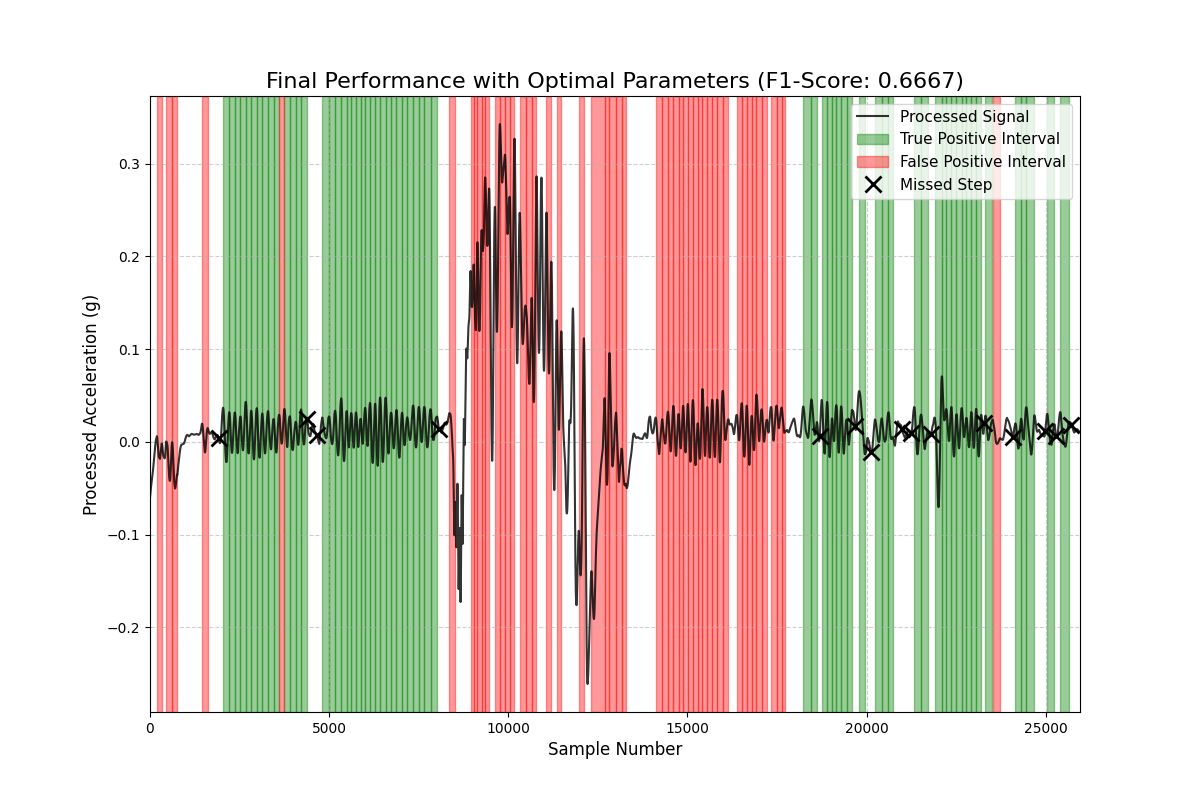

In [21]:
def plot_best_result(signal, manual_steps_df, best_params):
    """
    Takes the best parameters, runs the algorithm, and generates a
    detailed performance plot.

    Args:
        signal (np.array): The processed signal that was analyzed.
        manual_steps_df (pd.DataFrame): DataFrame with 'sample_number' column.
        best_params (dict): Dictionary of the best parameters found by the optimizer.
    """
    print("\n" + "="*55)
    print("         VISUALIZING THE BEST PARAMETER SET")
    print("="*55)

    signal = np.asarray(signal)

    # --- 1. Reconstruct the bounds from the best parameters ---
    m1m_lower = best_params['max1_min_lower']
    m1m_upper = m1m_lower + best_params['max1_min_delta']
    max1_min_b = (m1m_lower, m1m_upper)

    m2m_lower = best_params['max2_min_lower']
    m2m_upper = m2m_lower + best_params['max2_min_delta']
    max2_min_b = (m2m_lower, m2m_upper)
    
    m1m2_lower = best_params['max1_max2_lower']
    m1m2_upper = m1m2_lower + best_params['max1_max2_delta']
    max1_max2_b = (m1m2_lower, m1m2_upper)

    # --- 2. Run the detection algorithm with the optimal parameters ---
    print("\nRunning final detection with the best parameters...")
    detected_intervals = find_step_intervals_by_diff(
        signal=signal,
        min_peak_interval=best_params['min_peak_interval'],
        max1_min_diff_bounds=max1_min_b,
        max2_min_diff_bounds=max2_min_b,
        max1_max2_diff_bounds=max1_max2_b
    )

    # --- 3. Perform the comparison logic ---
    manual_steps_arr = manual_steps_df['sample_number'].to_numpy()
    is_manual_step_detected = np.zeros(len(manual_steps_arr), dtype=bool)
    is_interval_a_true_positive = np.zeros(len(detected_intervals), dtype=bool)

    for i, manual_sample in enumerate(manual_steps_arr):
        for j, interval in enumerate(detected_intervals):
            if interval[0] <= manual_sample <= interval[1]:
                is_manual_step_detected[i] = True
                is_interval_a_true_positive[j] = True
                break
    
    true_positives = np.sum(is_manual_step_detected)
    false_negatives = len(manual_steps_arr) - true_positives
    false_positives = len(detected_intervals) - np.sum(is_interval_a_true_positive)
    
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print("\n--- Final Performance Report ---")
    print(f"F1-Score: {f1_score:.4f} (Precision: {precision:.2%}, Recall: {recall:.2%})")
    print(f"  - Correctly Detected: {true_positives}")
    print(f"  - Missed Steps:       {false_negatives}")
    print(f"  - False Detections:   {false_positives}")

    # --- 4. Generate the detailed plot ---
    true_positive_intervals = [interval for i, interval in enumerate(detected_intervals) if is_interval_a_true_positive[i]]
    false_positive_intervals = [interval for i, interval in enumerate(detected_intervals) if not is_interval_a_true_positive[i]]
    missed_steps = manual_steps_arr[~is_manual_step_detected]

    plt.figure(figsize=(12, 8))
    plt.plot(signal, color='black', label='Processed Signal', zorder=2, alpha=0.8)

    # Plot True Positives (Green shaded areas)
    for i, interval in enumerate(true_positive_intervals):
        label = 'True Positive Interval' if i == 0 else ""
        plt.axvspan(interval[0], interval[1], color='green', alpha=0.4, label=label, zorder=1)

    # Plot False Positives (Red shaded areas)
    for i, interval in enumerate(false_positive_intervals):
        label = 'False Positive Interval' if i == 0 else ""
        plt.axvspan(interval[0], interval[1], color='red', alpha=0.4, label=label, zorder=1)

    # Plot Missed Steps (Black 'X' markers)
    valid_missed = missed_steps[missed_steps < len(signal)]

    if len(valid_missed) > 0:
        plt.plot(valid_missed, signal[valid_missed], 'kx', markersize=12, mew=2, label='Missed Step', zorder=5)

    title = f"Final Performance with Optimal Parameters (F1-Score: {f1_score:.4f})"
    plt.title(title, fontsize=16)
    plt.xlabel("Sample Number", fontsize=12)
    plt.ylabel("Processed Acceleration (g)", fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlim(0, len(signal))
    plt.show()


plot_best_result(signal_best, manual_steps, best_params_dict)
